In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X = mnist["data"]
y = mnist["target"]

In [7]:
X.shape,y.shape

((70000, 784), (70000,))

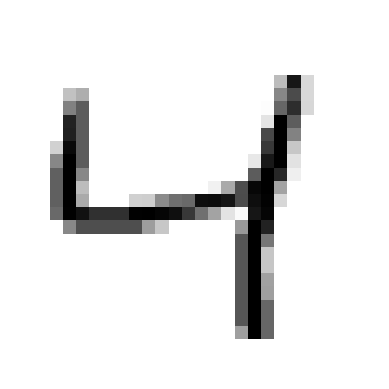

In [9]:
import matplotlib.pyplot as plt

digit_2 = X[2]
digit_2_image = digit_2.reshape(28,28)

plt.imshow(digit_2_image,cmap="binary")
plt.axis("off")
plt.show()

In [10]:
y[2]

'4'

In [29]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


In [30]:
# Count how many times each digit appears in y_train
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
digit_counts = dict(zip(unique, counts))
print(digit_counts)


{'0': np.int64(5923), '1': np.int64(6742), '2': np.int64(5958), '3': np.int64(6131), '4': np.int64(5842), '5': np.int64(5421), '6': np.int64(5918), '7': np.int64(6265), '8': np.int64(5851), '9': np.int64(5949)}


In [31]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# Now these comparisons will work correctly
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [32]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train,y_train_4)

SGDClassifier(random_state=42)

In [34]:
sgd.predict([digit_2])

array([ True])

In [35]:
# Train on all 10 digits
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Evaluate on test set
y_pred = sgd.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.874
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.97      0.96      0.97      1135
           2       0.93      0.78      0.85      1032
           3       0.78      0.92      0.84      1010
           4       0.96      0.79      0.87       982
           5       0.86      0.79      0.83       892
           6       0.96      0.89      0.93       958
           7       0.93      0.89      0.91      1028
           8       0.65      0.90      0.75       974
           9       0.84      0.87      0.86      1009

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.88     10000



In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml

# Initialize classifier
sgd = SGDClassifier(random_state=42)

# Perform 3-fold cross-validation on training set
scores = cross_val_score(sgd, X_train, y_train, cv=3, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.87365 0.85835 0.8689 ]
Mean accuracy: 0.8669666666666668


In [40]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=3)              

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

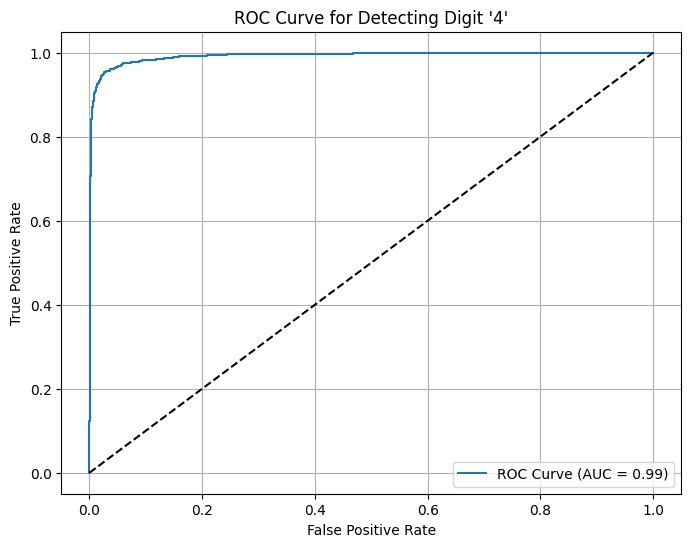

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Binary classification: 1 if digit is 4, else 0
y_binary_train = (y_train == 4)
y_binary_test = (y_test == 4)

# Train binary classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_binary_train)

# Get scores (not just predictions)
y_scores = sgd.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_binary_test, y_scores)
auc_score = roc_auc_score(y_binary_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Detecting Digit '4'")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [45]:
# Predict on test set
y_pred_rf = rf.predict(X_test)

In [46]:
# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9705
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Accuracy: 0.9805555555555555
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



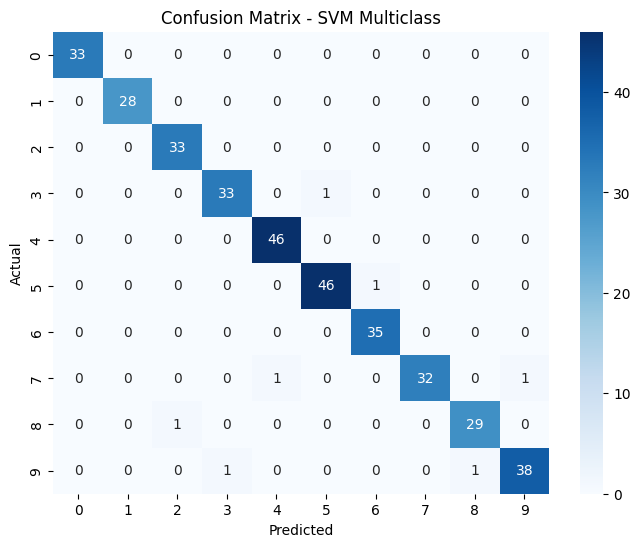

In [47]:
# Multiclass Classification

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST-like digits dataset (8x8 images, 0–9 digits)
digits = load_digits()
X = digits.data
y = digits.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (very important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with RBF kernel (default)
svm_clf = SVC(kernel='rbf', gamma='scale', C=10)  # C controls regularization
svm_clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = svm_clf.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM Multiclass")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [50]:
def shift_image(image, direction):
    image = image.reshape(8, 8)  # CHANGE THIS to 8x8
    shifted = np.zeros_like(image)

    if direction == "left":
        shifted[:, :-1] = image[:, 1:]
    elif direction == "right":
        shifted[:, 1:] = image[:, :-1]
    elif direction == "up":
        shifted[:-1, :] = image[1:, :]
    elif direction == "down":
        shifted[1:, :] = image[:-1, :]

    return shifted.reshape(64,)  # flatten back to 1D


In [51]:
X_augmented = []
y_augmented = []

for img, label in zip(X_train, y_train):
    X_augmented.append(img)
    y_augmented.append(label)

    for direction in ["left", "right", "up", "down"]:
        shifted_img = shift_image(img, direction)
        X_augmented.append(shifted_img)
        y_augmented.append(label)

X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)


In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Create and train model pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma="scale", C=5))
])

pipeline.fit(X_augmented, y_augmented)

# Evaluate on original test set
y_test_pred = pipeline.predict(X_test)
print("Accuracy after data augmentation:", accuracy_score(y_test, y_test_pred))


Accuracy after data augmentation: 0.9888888888888889
